In [6]:
import nltk
import random
#from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize



class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    


documents_f = open("documents.pickle","rb")
documents = pickle.load(documents_f)
documents_f.close()





# all_words = nltk.FreqDist(all_words)


# word_features = list(all_words.keys())[:5000]


word_features5k_f = open("word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features



open_file = open("featuresets.pickle","rb")
featuresets = pickle.load(open_file)
open_file.close()



random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]


open_file = open("naivebayes.pickle","rb")
classifier = pickle.load(open_file)
open_file.close()
# print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
# classifier.show_most_informative_features(15)

###############



open_file = open("BernoulliNB_classifier5k.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()
# print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)



open_file = open("LogisticRegression_classifier5k.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()
# print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)



voted_classifier = VoteClassifier(classifier,BernoulliNB_classifier,LogisticRegression_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


# print("Classification:",voted_classifier.classify(testing_set[0][0]), "Confidence %:",voted_classifier.confidence(testing_set[0][0]))


def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))





10664
voted_classifier accuracy percent: 83.13253012048193
('pos', 1.0)
('neg', 1.0)


In [2]:
print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 1.0)
('neg', 1.0)


In [7]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

print("working")

ckey="fRMGwAvltBLrvXx1xnmgszpDS"
csecret="1vTdKwPfs5GBHV5Fhw2KmFIKODabjvFGrVK3Xcbht7eghaCrdh"
atoken="1307048290286886912-kuUGu11rBII1Nv25sVIG4tChpzOhBP"
asecret="ps2l35Q1TPj11lBWDV1Bac5q4T6pYj9hGCYoEQkFyxdxx"



class listener(StreamListener):
    
    def __init__(self):
        self.count=0
    
    def on_data(self,data):
        all_data = json.loads(data)
        tweet = all_data["text"]
        sentiment_value, confidence = sentiment(tweet)
        
        
        if(confidence*100 >=80 and self.count<=2000):
            print(tweet, sentiment_value, confidence)
            self.count+=1
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()
        
        elif(self.count>2000):
            return True
        
        return True
    
    def on_error(self,status):
        print(status)

auth = OAuthHandler(ckey,csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["feeling"])



working
RT @Rjeff24: I don’t get a vote yet, but I’m really feeling bad for the Denver Nuggets right now. Blows my mind that @kingjames goes 25 and… neg 1.0
grandma sent over her special idlis and chicken curry 🙈🙈🙈 feeling on top of world 🙈🙈 neg 1.0
RT @DeepikaBhardwaj: Ayejijijijijijijijijijiji. Feeling elated. Spoke to Kuldeep. Looks like things are moving. IG HAP Madhuban has asked f… pos 1.0
RT @mfaizanahmad: Wow Thanks for Giving Space On Stage screen💝. Feeling Hoñored.
#ActivistsInKarachi
@Lalika79 , @MeFixerr @dtnoorkhan @Mah… neg 1.0
London looks so nice when it’s sunny that even the rats are feeling themselves pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @ObeyMissTiffany: Unlimited spins on the #ballbustin wheel all weekend.  Feeling a type of way 😒 f... https://t.co/a3mQ9pEQkM neg 1.0
careful going home. She was visibly tired from putting in a ton of hours at her job the week prior but that's it. T… https://t.co/c1jJ9D9ZA7 neg 1.0
RT @h

RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Ashish_Janat: @RayuduAmbati feeling happy after your knock tonight &amp; even more happy after reading those marked line. I wish some of st… pos 1.0
RT @NaileaDevora: tired of feeling tired neg 1.0
RT @jessicapinkuk: I’m ready and waiting...
Like if you would bury something between my cheeks... if you’re feeling naughty enough comment… neg 1.0
RT @_danimalssss: Ovulation day have you feeling like aloe Vera 😭😭 &amp; your hormones be through the roof neg 1.0
@notbenfish Yeah but it’s begrudging. I hate this feeling. I can’t go full Pepe Le pew and I can’t go full Elliot R… https://t.co/i2mLowDx0N pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @justair2mewgulf: Some final thoughts before I sleep. I want to touch a little bit on why MG aren't saying goodbye, even with their emot… neg 1.0
RT @Worldgoneweirde: I have GREAT NEWS my Ultra Liberal son and his wife have taken the R

RT @KDTrey5: Looking at your phone after being away from it for 2 hours and no texts or nothin, is a tough feeling man lol it hurts neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @f_tahitian: 💋Hi, Loves! I won't be in TwitterLand much 2day as I'm not feeling well🙄💋.  If you feeling like sending some luv👉🏽 Cashapp:… neg 1.0
unsa kahay feeling naay uyab no haha neg 1.0
Bro just like me neg 1.0
Feeling so useless. neg 1.0
https://t.co/SXPUcsDgwd neg 1.0
RT @justair2mewgulf: Some final thoughts before I sleep. I want to touch a little bit on why MG aren't saying goodbye, even with their emot… neg 1.0
RT @aproko_doctor: This is why many people who are depressed don't talk to others about their pain

1. You either don't understand
2. You j… neg 1.0
@isfpthought welcome back !!!!!! hope ure feeling better now !!!! neg 1.0
@FA_lovesyoutoo *his face become more red behind those hands

"eh what kind of otome game situations is this?! Is t… https://t.co/qAg2E

👀 first impression : asik bnget orangnya 
🏷  your nickname in my head : beautiful feeling😭
🏇 closeness ratings : 5/… https://t.co/8EhqRHi4NF pos 1.0
Feeling is step one "in-taking why I AM" in-taking a "liking" towards
Assuming is step two "in-taking what I AM" gi… https://t.co/DgpW6Peggv neg 1.0
RT @OsheaJacksonJr: Fuck you Colby Covington. Vote for who you wanna vote for. Praise who you wanna praise. That part don’t matter to me. W… neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
this HAS to be the fear every time you take one of these crazy putting lines — next thing you know you're just putt… https://t.co/CmnAdVnfKa neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this https://t.co/CGWZzI9Vwo neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@NFLGirlUK Start off excited, see whos inactive and worry, then mainly a feeling of 

@market_veg i'm sorry sis :( i'm hoping you're feeling much better by now, and don't let anyone or anything bring y… https://t.co/cWTkcUIFkg neg 1.0
My mother chose my name Mauricio because she loved Ravel's music. Being here in front of this house, where he lived… https://t.co/Z6pxNtGoIi pos 1.0
😂😂 @ “nail and lunch money” equating to being spoiled yet honestly that’s the bare minimum. Yikes. pos 1.0
RT @fatehshernu: 7. When feeling resistance, ask yourself, “What does the resistance feel like? Is there a way to accept the thing you’re r… neg 1.0
RT @ifernweh: I hope you feel what I’m feeling too.

หวังว่าเธอจะรู้สึกเหมือนที่ฉันรู้สึกบ้าง neg 1.0
@Rebeccakhx Every Muslim girl that has a hijabi mama will definitely tell you that they’ve worn it and walked aroun… https://t.co/Wv0TT46ztx neg 1.0
@barstoolsports @goingdeep I feel like this is scripted. Just a feeling though. neg 1.0
RT @helmyyelmo: Missing someone and not being able to see them is the worse feeling neg 1.0
RT @LocdWithNes

RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
losing a parent is a whole different feeling. i pray God bless them and watch over them🥺. neg 1.0
Обновила цвет волос
Feeling очень pretty 👉👈 https://t.co/ihwwYjqxaz neg 1.0
RT @_danimalssss: Ovulation day have you feeling like aloe Vera 😭😭 &amp; your hormones be through the roof neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
Remember when Hueningkai said that he can't trust moa bc we trick them to show their hair colour , I mean after all… https://t.co/PSHNmMIOFq neg 1.0
RT @botkars: So what do you think of feeling Hamon? ...Hm? A nice yell? Good answer! pos 1.0
RT @helmyyelmo: Missing someone and not being able to see them is the worse feeling neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @rjmxrell: i hope you feel what i’m feeling too neg 1.0
RT @Thuglos: Since we 

@EddieMars16 I was feeling the same the entire time he was singing neg 1.0
nawt yall invalidating people's feeling omg— neg 1.0
RT @BinnieYang: tw // trigger ch*an clip

"there are times in life where in we just want to end everything but then, we will have this stra… neg 1.0
RT @Worldgoneweirde: I have GREAT NEWS my Ultra Liberal son and his wife have taken the RED PILL. My other Son is doing the same. All 3 are… neg 1.0
RT @SofiOksanen: Never ever have I seen #Tallinn’s Old Town this empty. As long as I remember  it has been so crowded. Weird feeling, but o… neg 1.0
RT @Lissthesassy: @Valerygirl67 @RepAdamSchiff I have a feeling she is ready😉good morning Val. neg 1.0
HAHAHAHAHA SONGS NAMAN DIYAN TOL neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @OsheaJacksonJr: Fuck you Colby Covington. Vote for who you wanna vote for. Praise who you wanna praise. That part don’t matter to me. W… neg 1.0
It seems to me a person is involved, this could be an Arie

best feeling in the world is when your body wakes you up 15 mins before football gameday. no waiting, just immediat… https://t.co/9AnlaKRqHf pos 1.0
RT @alakazam1988: […] I woke up the next morning and forgot about the dream pretty fast. Until I realized how chubby my dick felt all day.… neg 1.0
@jaeyounqz FR FR IM CRUOG IM FEELING  FEL7NGS FEELS EMOTIONS EXTREME UNCONTOLABEL EMOTIONS neg 1.0
RT @NatiBunz: Guys, you still feeling curious? 😅😅 https://t.co/ytoLArCppO neg 1.0
Yeah...I have this feeling too that JK might be appearing there more, which is why it's important we cheer for him… https://t.co/ioCMGg3lHk pos 1.0
RT @noonessaveu: Losing interest at everything because you're sad is the worst feeling. neg 1.0
RT @mountaingypsy41: Feeling pregnant af 😊🤰 #preggo https://t.co/76CyOPSm2g neg 1.0
Feeling cute, ampt.🙂 https://t.co/mCreljf9PG neg 1.0
wonder how all the people who said wayv isn’t nct are feeling rn😹 neg 1.0
Who’s feeling horny today... pos 1.0
RT @Worldgoneweirde: I have GR

RT @WolfSkullJack: “I’ve heard this movie might be sad so I’ll watch it when I’m feeling mentally stable enough to deal with it’
*Never wat… neg 1.0
RT @KlTTYPANTS: It is very sexy and brave of me to lose feeling in my hands and feet every couple of hours pos 1.0
RT @ItzAnny5: Dear SSR,I am not from ur country,🇧🇩 not from ur religion also.But I have strong feeling for u. You're not only actor but als… neg 1.0
#MomocloMania2019Live
And it is over!! What an amazing LIVE it was. How much I enjoyed it. How much I was missing w… https://t.co/awlbe9Xc0c pos 1.0
RT @icedoutomnitrix: I be feeling like a lil slut when I drink water n a lil bit leaks out of my mouth and drips off my chin onto my chest neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@BaldKaz @EvanDriscoll10 @4catsnomore @martin_mckee @jonburkeUK @RailtonLTN @thejournojames @clairekholland… https://t.co/WuUoRDtJ3u neg 1.0
It's been a hard week, with disheartening news, an election coming up, and t

RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
😬 neg 1.0
@ARia12814601 even i don't know what im feeling, all excitement and such idk :(( neg 1.0
RT @_cocainepapi: Grilllllll . neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
CURRENTLY
we have a calm
on the gulf coast 
before the tropical 
storm. As Patriots we
are currently 
feeling the s… https://t.co/SdDurLH9vs pos 1.0
Feeling #VioletPride for the looooooong list NYU alumni who received 2020 #Emmy nominations! 💜

Join us in rooting… https://t.co/7LDpjWg5Ik neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @helmyyelmo: Missing someone and not being able to see them is the worse feeling neg 1.0
Kisi ne ye socha hain jb #kurataPajam  100million hoga to feeling kya hogi 👉👉🤣🤣 verry happy in my heart dil dance m… https://t.co/chE4HCWPPu pos 1.0
RT @hkhyuka: i don't know but i have a feeling that txt next title track could be their biggest hit, t

RT @Active_Minds: Active Minds and our partner, just., know that students are feeling stressed &amp; experiencing anxiety, now more than ever.… neg 1.0
RT @wtfKevv: I swear the worst feeling in the world is knowing you did your best and it still wasn't good enough. neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @CowboysNews365: #CowboysNation How are y'all feeling about the game today? Thoughts? Predictions? https://t.co/UGI5poQyiu neg 1.0
RT @b0sskillah28: Being inlove to the person you want to be with is a greatest feeling for me. pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @FindomMonika: Things are pretty dead right now in 2DFD, so lets go with an engagement post~
Everyone like + RT
Doms Post a pic below an… neg 1.0
FUCK OFF KEPA YOU USELESS SPANISH FRAUD neg 1.0
RT @arsbeomshi: not to be that fan but i miss the old kpop. wherein it's okay for idols to interact w/ each other on cam, wherein it's much… neg

feeling ko sobrang dami kong problema pos 1.0
RT @Worldgoneweirde: I have GREAT NEWS my Ultra Liberal son and his wife have taken the RED PILL. My other Son is doing the same. All 3 are… neg 1.0
dari babak pertama gue udah feeling ini kiper pasti bakal blunder, kan kejadian hahahah dahlah. neg 1.0
RT @shantibandillo_: im tired of feeling tired wtf neg 1.0
But at the end of it all they were there and they loved it. They miss that feeling. pos 1.0
feeling oddly confident about this one... let’s go 2-0 @Jaguars pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @justair2mewgulf: Some final thoughts before I sleep. I want to touch a little bit on why MG aren't saying goodbye, even with their emot… neg 1.0
RT @JIMlNLIPS: @NEGR0SWAN hi, my apologies for bothering, but I have a couple of days to gather $2000 to pay the clinic my grandpa is stayi… neg 1.0
@DamienCurze "....some do, they call it puberty. Have you told them that you are feeling like this pup? It

RT @Rjeff24: I don’t get a vote yet, but I’m really feeling bad for the Denver Nuggets right now. Blows my mind that @kingjames goes 25 and… neg 1.0
@thewayitis35 Ugh know the feeling, hope it passes and you are feeling better soon! 💕 neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @AnaisKru: Hello guys, how are you? 🙈I'm sorry I wasn't very active, I haven't been feeling very well lately and needed to rest a bit. neg 1.0
RT @SamGrittner: I got to hug a girl I’ve had a crush on last Sunday. As someone who has done heroin I’ll be honest it, it was the best fee… pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@urvashi01 @Mundra08 I'm agree but  what about adverse drug reactions / common side effects such as Pain, swelling,… https://t.co/uIYjXRnIJM neg 1.0
Being able to ste

RT @Worldgoneweirde: I have GREAT NEWS my Ultra Liberal son and his wife have taken the RED PILL. My other Son is doing the same. All 3 are… neg 1.0
These from yesterday fansign 🥰 Is it just my feeling or I am showing too many similar pics? HAHA. I will upload tod… https://t.co/YhOH7bLPI7 neg 1.0
Ajde akademici vibe it... Rly rly dig on it and then... Remember that feeling neg 1.0
@tarullotweets @vanah_musix I hope you are feeling better! neg 1.0
starting to get what christopher nolan is feeling pos 1.0
@itscrypticbro @getteww @obamaintern Yea ig she wasn't feeling me but it's cool pos 1.0
RT @OsheaJacksonJr: Fuck you Colby Covington. Vote for who you wanna vote for. Praise who you wanna praise. That part don’t matter to me. W… neg 1.0
RT @DineshDSouza: My films always get fantastic ratings from the audience. The really surprising number here is from the critics. This film… pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in ou

@JuliaHB1 Only 7% of the population have a double barrelled surname...feeling persecuted yet? neg 1.0
Brandon's performance got me feeling emotional 😭#IdolsSA pos 1.0
RT @kxthleen: me: *needs to spend a day in bed semi-regularly for my physical health*
also me: *spends all of said day feeling mentally shi… pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
Are you feeling tired and down?
Do you need a good massage?
Do you need a relaxation?

WhatsApp 0598017538

#bodytobodymassage 
#thaimassage neg 1.0
Just from a human perspective, I am actually feeling sorry for Kepa. The guy's mental strength is gone neg 1.0
Wendy: So how depressed have you been feeling?

Yeri: I don't care anymore if my foot hangs over the bed where a mo… https://t.co/AuC3NB6zyi neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@Ned_James2 @LarrySabato I don’t get this.  Where does this “feeling” come from?  Statistical data indicates that i… https://t.

RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@Zike_Official how you feeling bro? neg 1.0
RT @Ri_Duu: I personally believe this person can't be trusted cuz he makes many claims no one knows their credibility. 

Recently he claime… neg 1.0
@daleizcrazy It's feeling to me that you are actively working for the other side. neg 1.0
@seaweedsangria Honestly, I've got a feeling that once we get people to be legitimately equal, a lot of words will… https://t.co/g0Q2mvDjVR pos 1.0
That feeling of being full after eating but it’s not 🤢 typa of full but this one☺️ pos 1.0
@laumilotionmore Mamsh feeling ko hindi eh so ako na lang as an offering sayo na lang yung PIC (AGAIN I REPEAT YUNG… https://t.co/QVO9pYa4FV neg 1.0
RT @magicalmoonbabe: This is a must read . It’s one of those books that stay with you because it covers such a current and important topic.… pos 1.0
@jaoscribs THIS IS SO GOOD HOLLLLYYYY i have so much respect for people who can actually figure out how to

RT @justair2mewgulf: Some final thoughts before I sleep. I want to touch a little bit on why MG aren't saying goodbye, even with their emot… neg 1.0
RT @brfootball: That four-goal feeling. 😁 https://t.co/4swdsgkEnk neg 1.0
I approve this message too even though as usual @realDonaldTrump is lying he will never go away his need to talk ab… https://t.co/6ErP6Ts9uv pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
feeling ko aabutin na ko ng sikat ng araw sa pagla-layout sa sobrang arte ko pos 1.0
Feeling your baby kick-a fetal movement guide #pregnancy #fetal - Discover more: https://t.co/5qiqoz4LhJ https://t.co/BRwxTCRxUd neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
AH ANJENG DAH PUNYA FEELING NIH TUKER AUBA SAMA MANE neg 1.0
This fucking feeling again... neg 1.0
Falling in love with our house more and more everyday, finally feeling like a home 🥰 @Blakesime16 pos 1.0
Feeling better after working out.🧘‍♀️🙌🏾🙏🏾 neg 1.0
As 

RT @BarackObama: There’s no feeling like finishing a book, and I’m proud of this one. In A Promised Land, I try to provide an honest accoun… pos 1.0
RT @DineshDSouza: My films always get fantastic ratings from the audience. The really surprising number here is from the critics. This film… pos 1.0
RT @WorshipLordElmo: Feeling down?
Open this. neg 1.0
Yar thode se hi die hard fans hain Punjab ke, Feeling bad for them😒 neg 1.0
I got a feeling it’s gonna be 6-0 pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @brfootball: That four-goal feeling. 😁 https://t.co/4swdsgkEnk neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
he probably never dived in his entire career !! Why ash , I was waiting for your performance, Really feeling bad for you !! #Ashwin #IPL2020 neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @shaqirw

@omarabobakrrr not feeling safe pos 1.0
Ot21zens how we feeling rn ? 😄 neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
if you really feel the need to donate to political candidates—a feeling I do not share—for fucks sake at least matc… https://t.co/vjzFn5JYeH pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @helmyyelmo: Missing someone and not being able to see them is the worse feeling neg 1.0
RT @SkyRacingTeam: 🅿2⃣ for @Marco12_B: «At the second start I was 4th and I decided to take a few risks using the soft rear tire. I struggl… neg 1.0
This feeling 👇 when u realise you’ve taken Son &amp; mane out your dream team this week!!!! Doooohhhhh #FantasyFootball… https://t.co/8kX4YuL3Ko neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
ang taray after 10 months naka-chismisan ko ulit siya HAHSHSHHAHAH kamiz. Sarap sa feeling na wala ka nang feelings. AaaaaAAAAaaHHH🖤 pos 1.0
RT @PsychToday:

RT @Zoehware: I’m feeling extra nice today so... order a big mystery box for only £25, and get £35 worth of art!! 🙌

That means lots of EXT… pos 1.0
😩 neg 1.0
@2feist2furious I mean I'm fine with people having issues or feeling burned but writing a super villain speech over it is absurd neg 1.0
TW DEREALISATION 

i dont like the feeling this video gives me 😃 https://t.co/dBoS1epULZ neg 1.0
Every time my coach post her new girls, I be feeling the urge to tumble. Lmfao. The way I would be in somebody’s ho… https://t.co/JtIauZA2Sg pos 1.0
RT @TurnTwo363: Since we're all feeling the effects on the passing of Supreme Court Justice Ruth Bader Ginsberg, here's a list of the Senat… neg 1.0
I have a strong feeling Tyler Higbee goes off today 

After seeing Logan Thomas’ success versus PHI last week, Higb… https://t.co/YxXMolvELS pos 1.0
RT @Eagles: Woke up feeling blessed.

@greengoblin | #FlyEaglesFly https://t.co/COiDcRENqo neg 1.0
RT @dontaskriy: these&gt;&gt;&gt;&gt; neg 1.0
RT @SRKAmit_: I

😜💟 How are you today boys, I'm really feeling a bit too lewd now lol 😜💙 #sketch neg 1.0
RT @ohheytaylorr: An H2hoe if you will neg 1.0
RT @DeepikaBhardwaj: Ayejijijijijijijijijijiji. Feeling elated. Spoke to Kuldeep. Looks like things are moving. IG HAP Madhuban has asked f… pos 1.0
imagine me not feeling like crap and wanting to die lol neg 1.0
RT @pamelaamorenoo: No hay feeling mas bonito que pagarle cosas a tus papás con tu dinero 🥺❤️ pos 1.0
RT @canoncrested: Just from a human perspective, I am actually feeling sorry for Kepa. The guy's mental strength is gone neg 1.0
i also thought that dadong was a popular ship🤡 top 10 anime betrayals pos 1.0
RT @recklessfoxx: Was feeling good about myself last night UwU 💙❤️💙❤️ https://t.co/IoYrY9ljb7 neg 1.0
RT @N1SHUH: when you are sleeping sad, and your mind isnt in a good condition, you overthink and your madness inside your heart is screamin… pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @Worldgoneweird

RT @muhdnajib103: when you're madly in love with someone. lol i miss that feeling sia neg 1.0
RT @channystasia: Sadio is feeling the Thiago effect too, I love this game pos 1.0
@/badideaa preaches about not pitting female artists against each other but i have a feeling he says a lot of sht i… https://t.co/nOoTqs7Wvl neg 1.0
RT @itzVikram_Jeet: ego is a disease. And it needs to be treated ,if you want to live a healthy and happy life. because ego is such a feeli… pos 1.0
I wanna sleep already but this "choking" feeling is really disturbing me... It's so hard to sleep if you are consta… https://t.co/rDoqwrBMJz neg 1.0
RT @ianhugen: you’ll always end up feeling empty when u keep on fulfilling yourself by someone else’s existence. 

the cycle will always re… neg 1.0
ot23ers feeling sexy rn bully them pos 1.0
RT @KyuuDevil: #XueXiao
“Now move to the monitor.”

Xiao Xingchen gasped, feeling the blade pressing against his neck.

“A-Yang, you don’t… neg 1.0
Lakers ain’t losing not one single g

RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
@maddieiona It’s sad, but it happens. Then they end up feeling worse about it, ruining yet another persons love life :) neg 1.0
please remove this feelings please. I dont want to feel this kind of feeling. neg 1.0
RT @izreen_syafika: Alone time is important to me. I like my own company. Sometimes i just wanna be on my own and doing my own things. It’s… neg 1.0
@NYSPORTSFAN1869 @Jared_Carrabis i have a feeling we light the shit outta castillo but bauer and gray are what i worry ab neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
omfg i needed this neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @PupStarTAKA: Wearing hats while my hair grows out. Feeling kinda cute. :3 https://t.co/uOFB3cZIJj neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
Man I hate feeling like this neg 1.0
RT @Thuglos: Since we all in our 20’s

RT @bbtashxxi: imo, streaming for views removes the magic from the music. it's like giving in to the capitalist nature of the music industr… pos 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @trevae07: Not feeling it anymore 🤦🏽‍♀️ neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @spideything: @ztweetalot Also would like to point out that a lot of athletic mothers go running with their children in buggy’s or go fo… neg 1.0
Me? Wise? Dude, you feeling okay? #CyndyBot neg 1.0
RT @Thuglos: Since we all in our 20’s feeling 75 I’m sharing this neg 1.0
RT @icedoutomnitrix: I be feeling like a lil slut when I drink water n a lil bit leaks out of my mouth and drips off my chin onto my chest neg 1.0
@flrtyjun hi bb :( i missed u i hope ur feeling better neg 1.0
RT @pushthefeeling: Name this feeling 🤪 🤔 part 1 w/ @DamagedBttm is up now!! Join for onky $6.99!! @ https://t.co/f50xH0ukjk #laborday #lab… neg 1.0
RT @NatoNorman: 2n

RT @wtfKevv: I swear the worst feeling in the world is knowing you did your best and it still wasn't good enough. neg 1.0
@Katpa73 Glad your fight is back Shannon. 👊😁👊I'm feeling stronger today, RBG's death really hit me hard. #UnitedWeWin #BidenHarris2020 neg 1.0
RT @AparBharat: Why do I get a feeling that 1992-1993 rιoτs was a fixed match between Hriday Samrat and Kaka... To supress BJP's growth in… neg 1.0
No matter how busy i try to keep myself, this feeling of loneliness and emptiness will always haunt me down.. neg 1.0
RT @jackfrost8: No better Feeling.... https://t.co/sW2OSfcCqC neg 1.0
RT @WaltYaMart: Norted Riku is finished!
(the feeling you get ,when you don't use a refrence 👌) https://t.co/CcS02PySo5 neg 1.0
@morningmika @MikaKYV365 I did the same and have started my exercise routine again too! I’m already feeling life get back on track. neg 1.0
@slydeinurdms Hmm, since its just for mutuals, maybe more honest opinions you have on stuff? Personal stories, how… https://t.co/sR

ProtocolError: ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

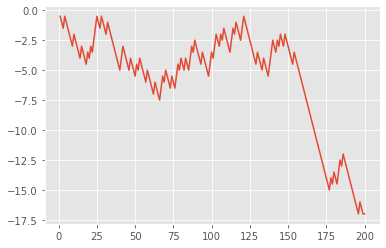

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 0.5

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
